In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

yf.pdr_override()

# For time stamps
from datetime import datetime
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

# The tech stocks we'll use for this analysis
tech_list = ['RELIANCE', 'IOC', 'INFY', 'TCS']
tech_list1 = ['RELIANCE.NS', 'IOC.NS', 'INFY.NS', 'TCS.NS']

for stock in tech_list:
    globals()[stock] = pd.read_csv(f"{stock}.NS.csv")

company_list = [RELIANCE, IOC, INFY, TCS]
company_name = tech_list

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.tail(10)

,Date,Open,High,Low,Close,Adj Close,Volume,company_name
2696,2023-12-04,3544.649902,3547.800049,3498.000000,3512.449951,3512.449951,1625213.0,TCS
2697,2023-12-05,3538.000000,3538.000000,3502.800049,3531.600098,3531.600098,1377656.0,TCS
2698,2023-12-06,3532.600098,3612.850098,3525.149902,3604.100098,3604.100098,1896572.0,TCS
2699,2023-12-07,3605.000000,3630.550049,3591.699951,3614.899902,3614.899902,1967653.0,TCS
2700,2023-12-08,3633.000000,3645.000000,3602.050049,3626.699951,3626.699951,1641155.0,TCS
2701,2023-12-11,3622.899902,3653.000000,3615.000000,3642.899902,3642.899902,1102503.0,TCS
2702,2023-12-12,3638.949951,3698.399902,3631.000000,3672.100098,3672.100098,2236866.0,TCS
2703,2023-12-13,3643.550049,3650.000000,3563.000000,3593.550049,3593.550049,3850968.0,TCS
2704,2023-12-14,3630.000000,3678.000000,3627.600098,3667.250000,3667.250000,3290396.0,TCS
2705,2023-12-15,3666.699951,3895.949951,3666.699951,3861.000000,3861.000000,8531230.0,TCS


In [2]:
RELIANCE.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3017.000000,3017.000000,3017.000000,3017.000000,3017.000000,3.017000e+03
mean,1136.274438,1148.289493,1123.679602,1135.550424,1116.205756,8.900576e+06
std,793.725756,801.221022,785.761575,793.313012,798.785308,6.310284e+06
min,308.587280,312.153198,307.695831,309.090179,281.488556,0.000000e+00
25%,429.736389,435.862396,424.981842,429.942108,407.185150,5.361239e+06
50%,849.415100,855.998291,840.728943,848.409302,826.410400,7.165089e+06
75%,1935.484131,1956.759277,1914.070557,1931.469116,1914.624023,1.012910e+07
max,3011.550049,3024.899902,2974.449951,3014.800049,3014.800049,7.134168e+07


In [3]:
INFY.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3017 entries, 0 to 3016
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          3017 non-null   object 
 1   Open          3017 non-null   float64
 2   High          3017 non-null   float64
 3   Low           3017 non-null   float64
 4   Close         3017 non-null   float64
 5   Adj Close     3017 non-null   float64
 6   Volume        3017 non-null   int64  
 7   company_name  3017 non-null   object 
dtypes: float64(5), int64(1), object(2)
memory usage: 188.7+ KB


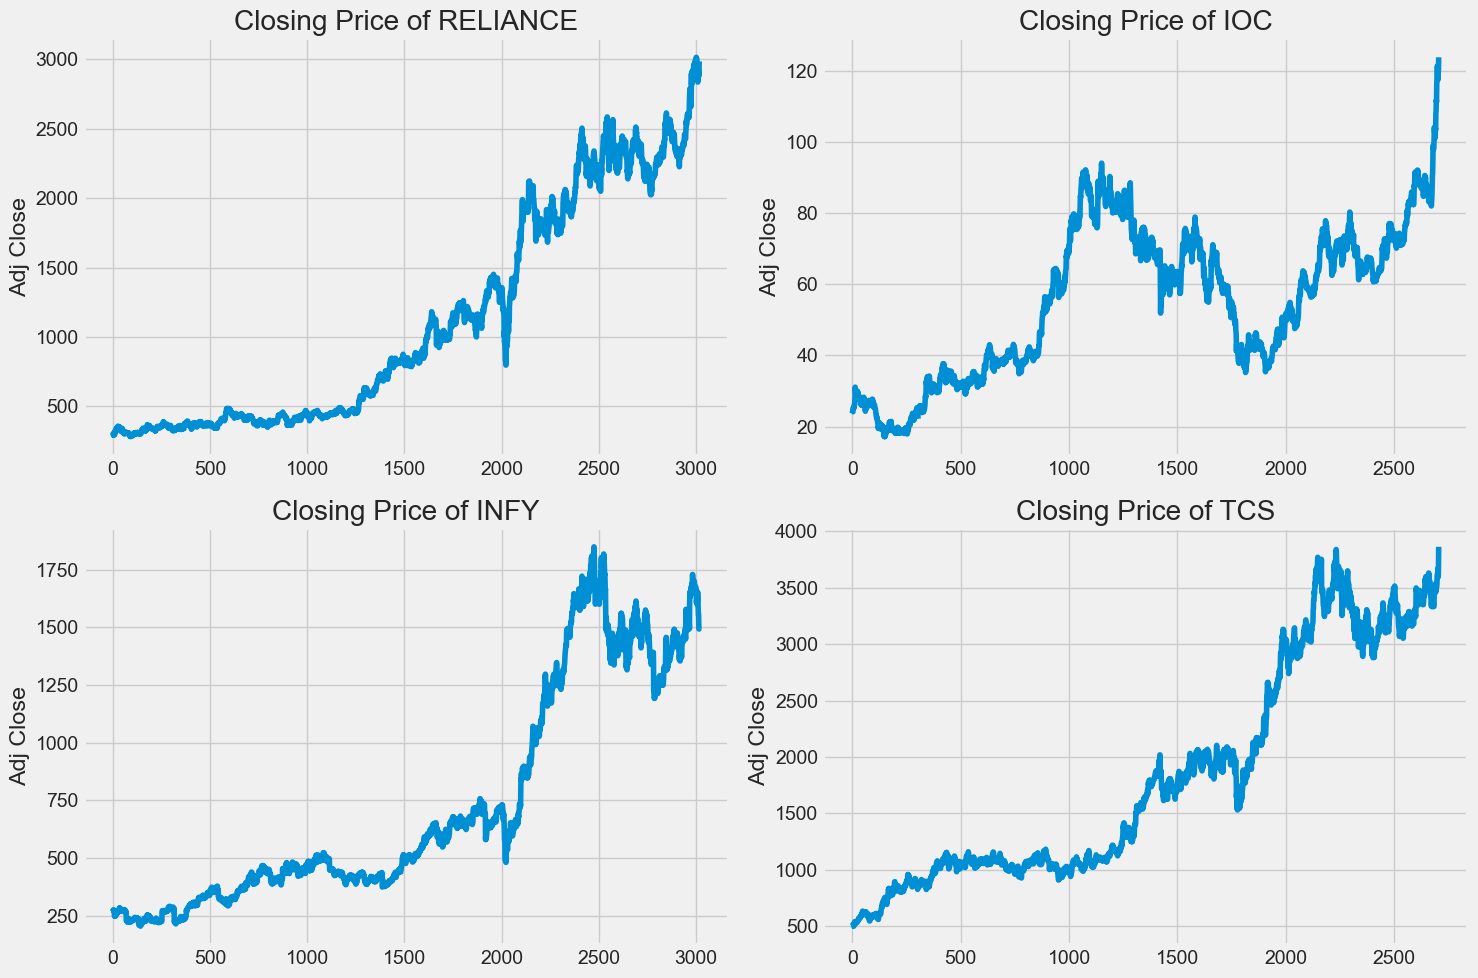

In [4]:
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")
    
plt.tight_layout()

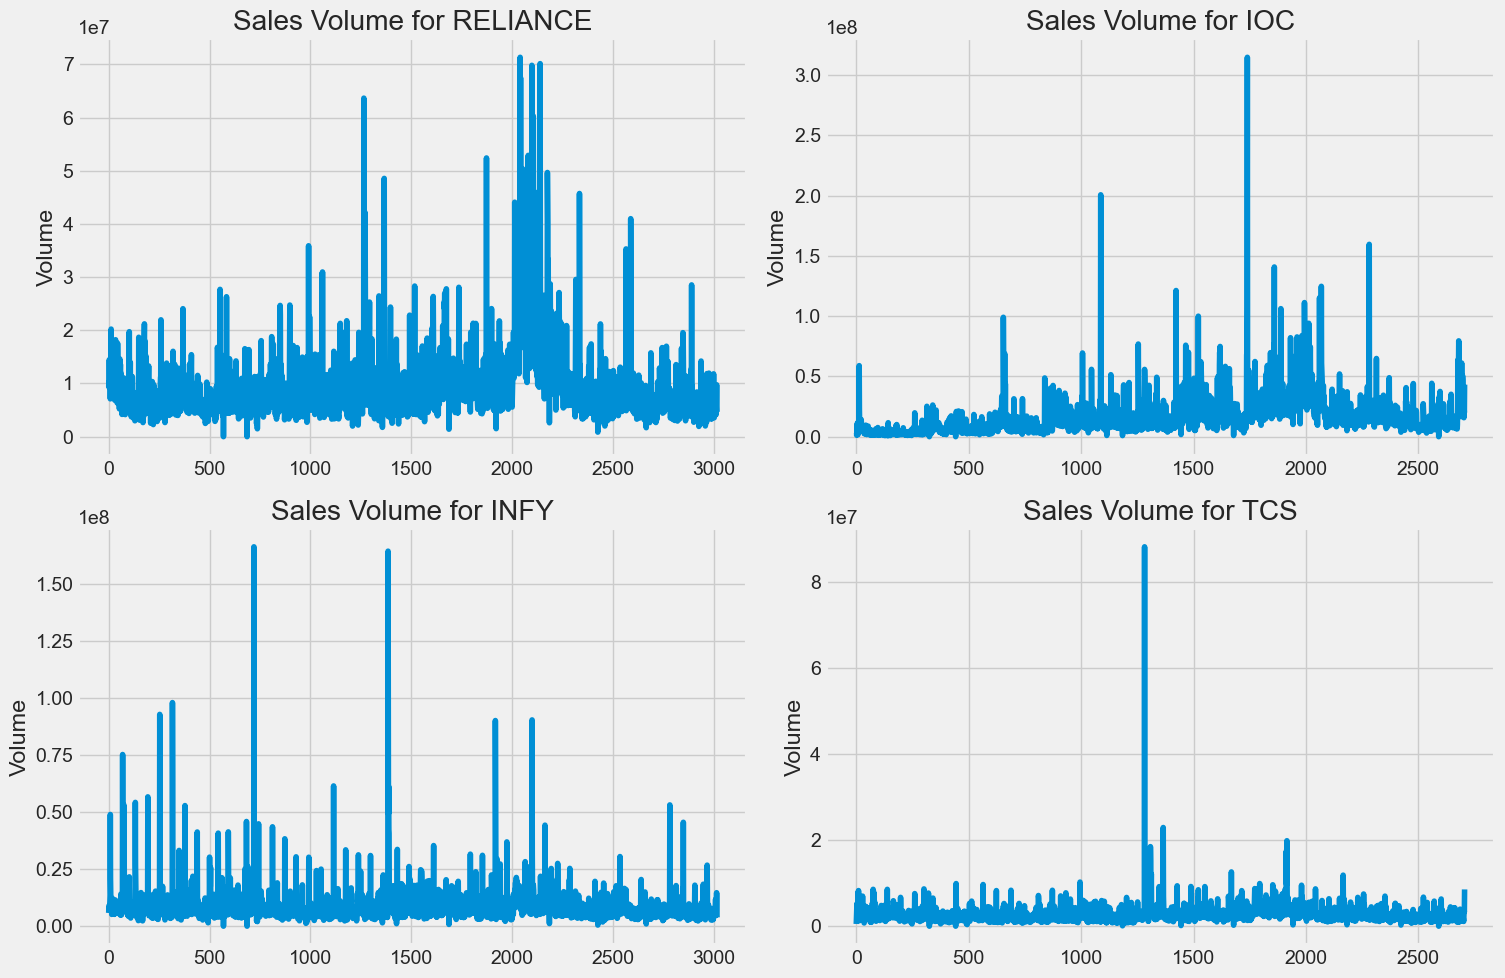

In [5]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")
    
plt.tight_layout()

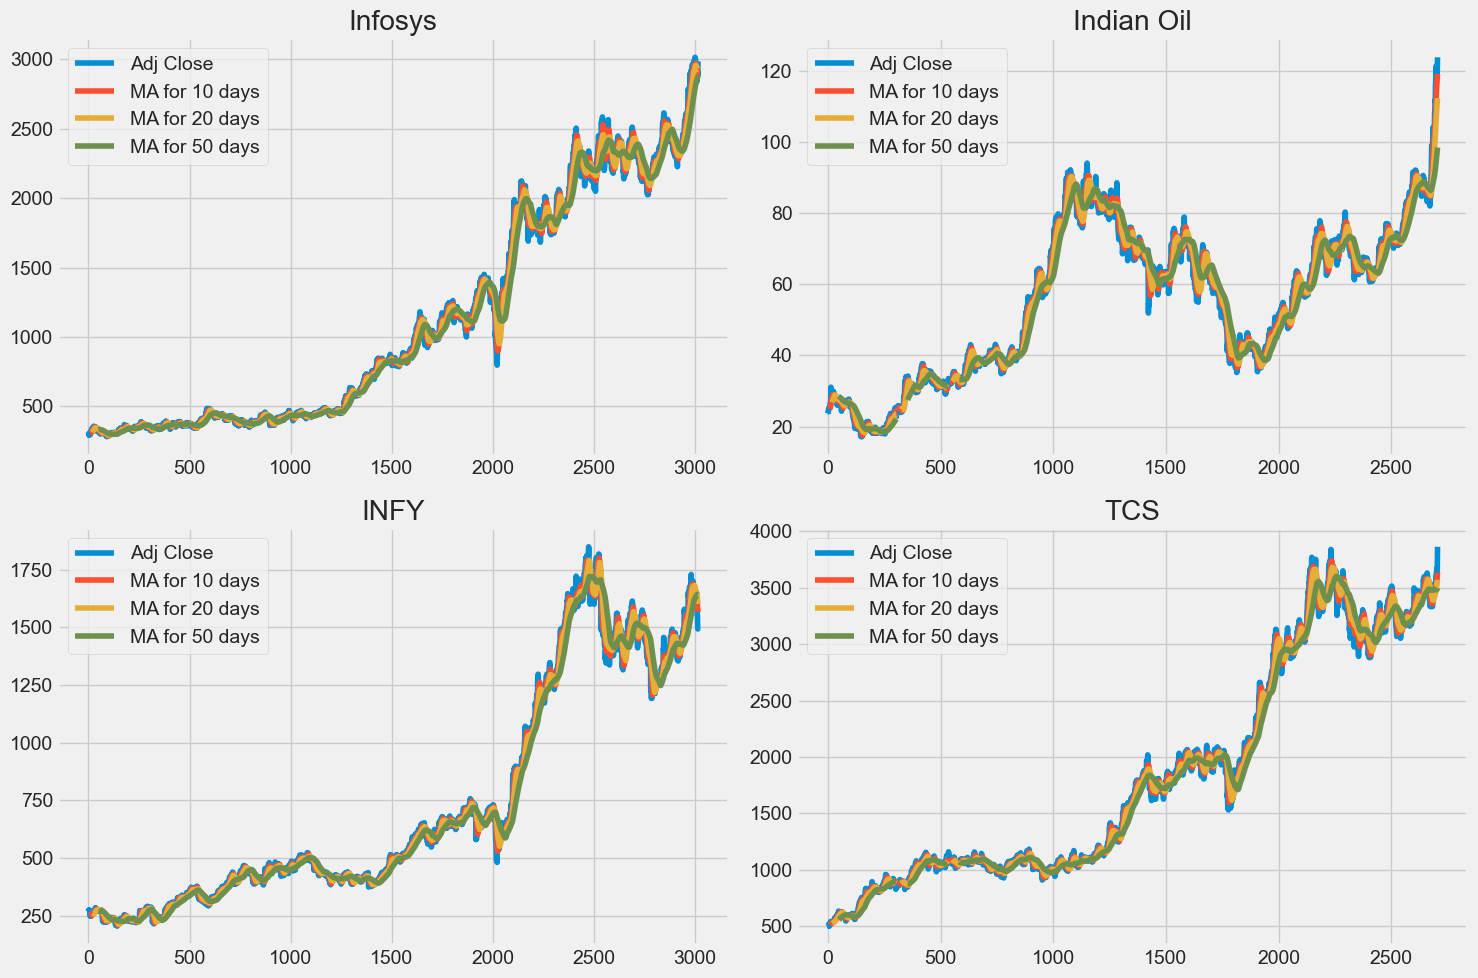

In [6]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()
        

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

RELIANCE[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('Infosys')

IOC[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('Indian Oil')

INFY[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('INFY')

TCS[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('TCS')

fig.tight_layout()

C:\Users\iampr\AppData\Local\Temp\ipykernel_10544\1150381457.py:2: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  company['Daily Return'] = company['Adj Close'].pct_change()
C:\Users\iampr\AppData\Local\Temp\ipykernel_10544\1150381457.py:2: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  company['Daily Return'] = company['Adj Close'].pct_change()


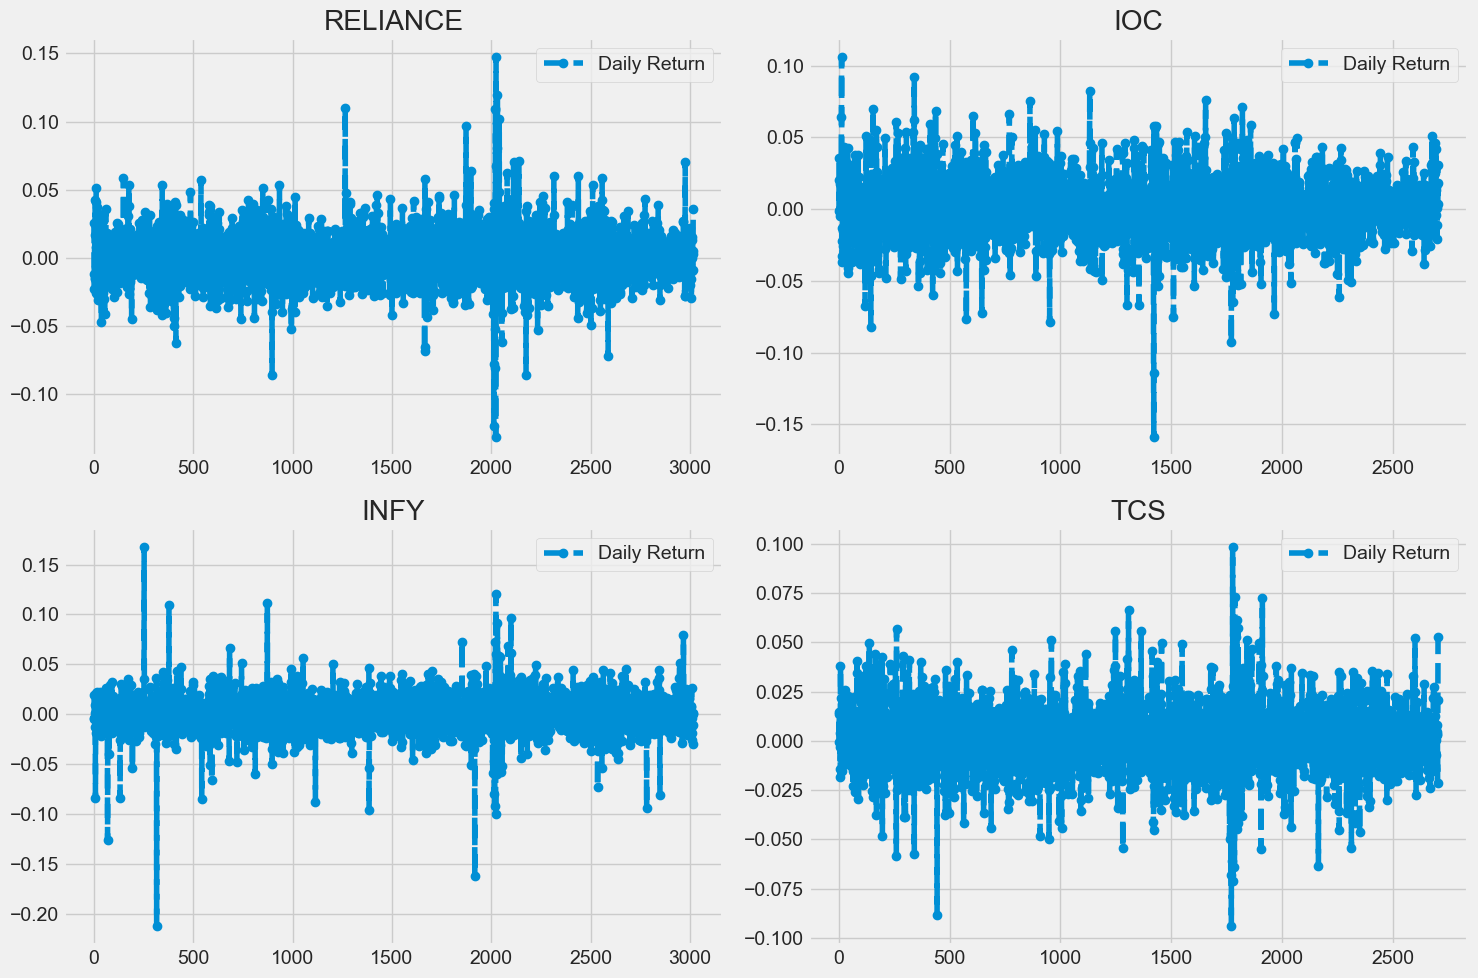

In [7]:

for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()


fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

RELIANCE['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('RELIANCE')

IOC['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('IOC')

INFY['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('INFY')

TCS['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('TCS')

fig.tight_layout()

In [8]:
closing_df = pdr.get_data_yahoo(tech_list1, start=start, end=end)['Adj Close']

tech_rets = closing_df.pct_change()
tech_rets.head()

[*********************100%%**********************]  4 of 4 completed


,INFY.NS,IOC.NS,RELIANCE.NS,TCS.NS
Date,,,,
2023-04-18,NaN,NaN,NaN,NaN
2023-04-19,-0.021559,0.007051,0.004978,-0.013144
2023-04-20,-0.007142,-0.004456,-0.002530,0.004920
2023-04-21,0.003229,0.000640,0.001257,0.018053
2023-04-24,-0.000855,0.000000,0.003831,0.004413


In [9]:
df = pdr.get_data_yahoo('ACC.NS', start='2012-01-01', end=datetime.now())

# df.to_csv("IRFC.NS.csv")
df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-02,318.553528,324.473816,314.141876,323.010895,294.166138,9404053
2012-01-03,325.616730,332.314240,324.748108,331.285614,301.701965,10244609
2012-01-04,332.542816,334.165741,326.119629,327.399689,298.163086,9270951
2012-01-05,326.873932,331.422760,317.319153,319.787872,291.230988,14479600
2012-01-06,318.667816,330.988434,318.484955,328.039734,298.745972,10287605


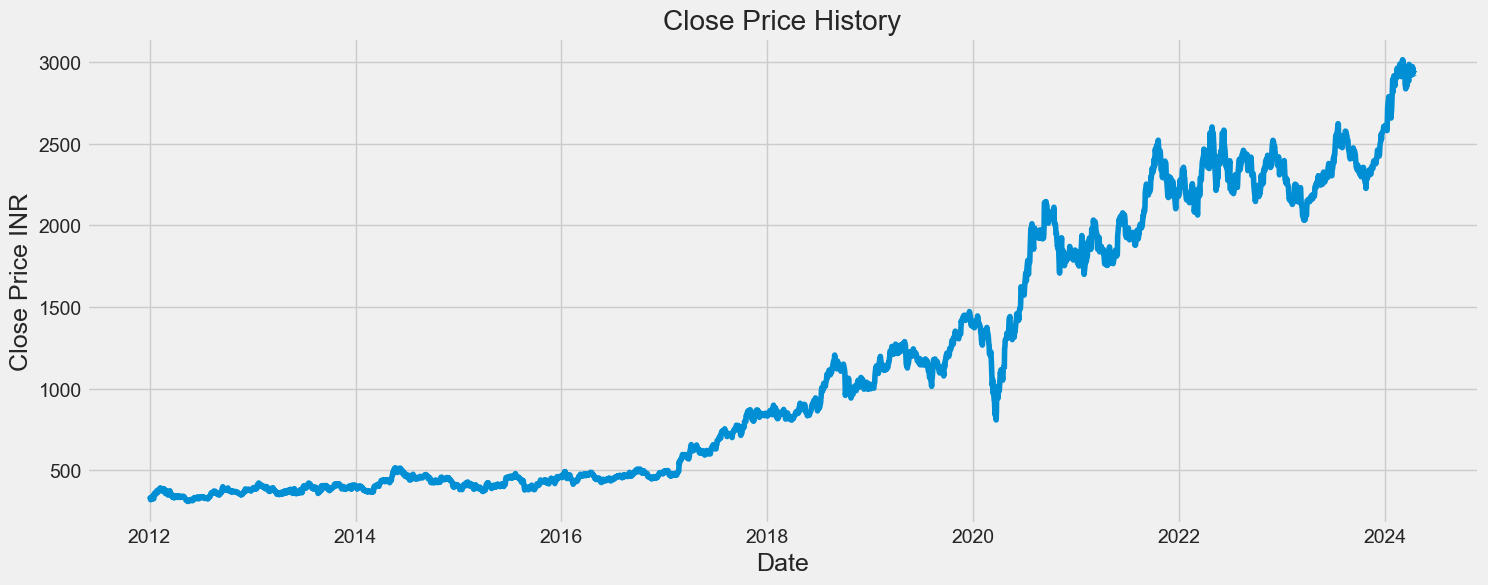

In [10]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price INR', fontsize=18)
plt.show()

In [11]:
data = df.filter(['Close'])

dataset = data.values

training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

2879

In [12]:

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00514494],
       [0.00820318],
       [0.00676699],
       ...,
       [0.96852946],
       [0.96921324],
       [0.96815987]])

In [13]:
train_data = scaled_data[0:int(training_data_len), :]

x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

[array([0.00514494, 0.00820318, 0.00676699, 0.00395375, 0.00700354,
       0.00509425, 0.0101547 , 0.01219072, 0.01027298, 0.00941127,
       0.00622631, 0.01114314, 0.01751307, 0.01850996, 0.0196927 ,
       0.01612757, 0.01818893, 0.01940546, 0.02438143, 0.02004752,
       0.02382386, 0.02620624, 0.02587676, 0.02740589, 0.02651038,
       0.02846191, 0.03080206, 0.03003327, 0.02824225, 0.02925604,
       0.0291969 , 0.02712709, 0.02303818, 0.02400972, 0.02829294,
       0.02657796, 0.02762554, 0.0243054 , 0.01780031, 0.02034321,
       0.02444058, 0.02278473, 0.02331697, 0.02051218, 0.01697239,
       0.01448017, 0.01650774, 0.02068958, 0.0243054 , 0.02338455,
       0.02036855, 0.01626274, 0.01334812, 0.01426897, 0.0155362 ,
       0.01018006, 0.01148107, 0.00912403, 0.00928454, 0.00838059])]
[0.008203183505169895]

[array([0.00514494, 0.00820318, 0.00676699, 0.00395375, 0.00700354,
       0.00509425, 0.0101547 , 0.01219072, 0.01027298, 0.00941127,
       0.00622631, 0.01114314, 0.0

In [14]:
print(x_train.shape[1], 1)

60 1


In [15]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error', metrics=["accuracy"])

history = model.fit(x_train, y_train, batch_size=1, epochs=1)


c:\Program Files\Python3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2320/2819 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.0011 - loss: 0.0026

In [ ]:
model.save("StockMarketPredictor.h5")

In [ ]:
test_data = scaled_data[training_data_len - 60: , :]

x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

print(x_test)

[array([0.71810464, 0.74080692, 0.74561681, 0.74539511, 0.72832148,
       0.72605297, 0.72330686, 0.73082884, 0.73154519, 0.73795849,
       0.7384701 , 0.73243216, 0.73318262, 0.74570208, 0.75627714,
       0.75651598, 0.76499306, 0.75626008, 0.75806805, 0.76052425,
       0.75069965, 0.74362125, 0.73707151, 0.73737857, 0.74865292,
       0.75573132, 0.77805833, 0.7688649 , 0.76741506, 0.78592139,
       0.78416458, 0.8187722 , 0.82888671, 0.82992717, 0.8214842 ,
       0.82069964, 0.83980294, 0.84790474, 0.85520493, 0.85403093,
       0.82405724, 0.80507883, 0.80448754, 0.81941889, 0.81073355,
       0.82002876, 0.82793793, 0.81461423, 0.80469083, 0.80082855,
       0.81326527, 0.81855041, 0.81293259, 0.8190493 , 0.82320717,
       0.82716175, 0.83828641, 0.83751024, 0.82378005, 0.83072834]), array([0.74080692, 0.74561681, 0.74539511, 0.72832148, 0.72605297,
       0.72330686, 0.73082884, 0.73154519, 0.73795849, 0.7384701 ,
       0.73243216, 0.73318262, 0.74570208, 0.75627714, 0.75

In [ ]:
    
x_test = np.array(x_test)

x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 131ms/step


44.599301557123475

C:\Users\iampr\AppData\Local\Temp\ipykernel_37040\1789871642.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


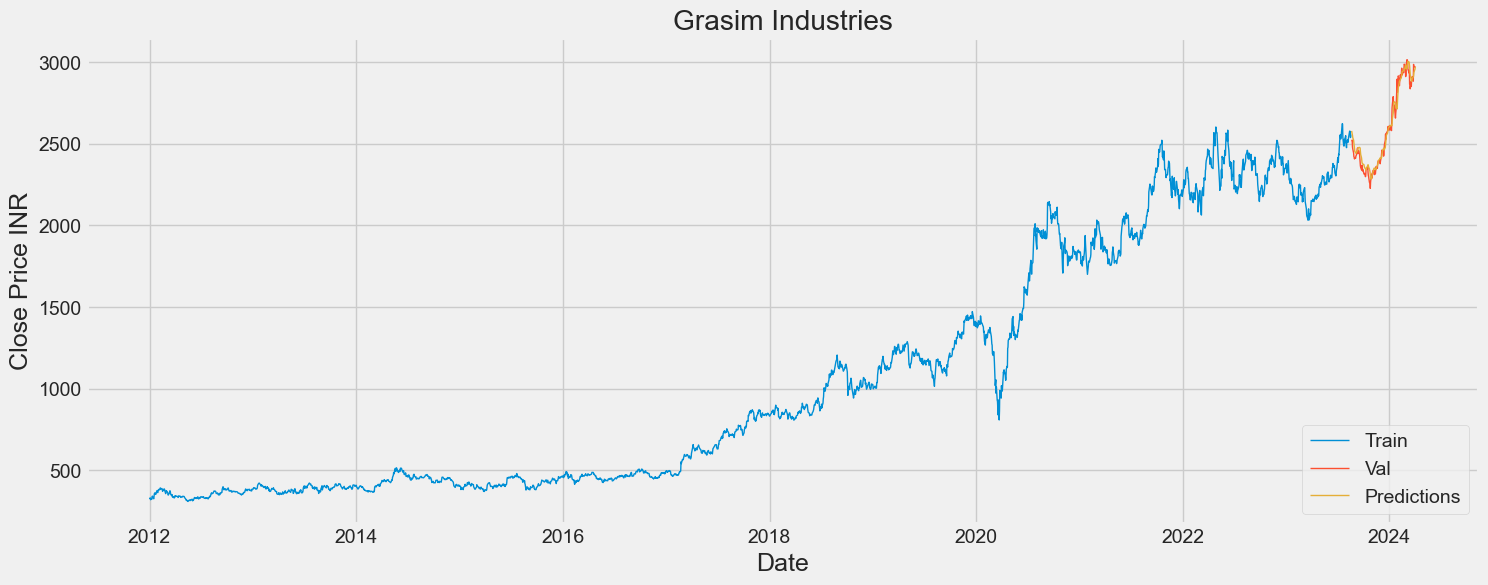

In [ ]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize=(16,6))
plt.title('Grasim Industries')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price INR', fontsize=18)
plt.plot(train['Close'], linewidth=1)
plt.plot(valid[['Close', 'Predictions']], linewidth=1)
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()